1. Import thư viện và đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị biểu đồ
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Đọc dữ liệu
df = pd.read_csv('D:\\doan_khdl\\data_science_project\\data_science_ecommerce\\src\\data\\raw\\sales_train.csv')

print("Đã tải xong dữ liệu!")

Đã tải xong dữ liệu!


2. Kiểm tra tổng quan

In [2]:
print("--- 5 dòng đầu tiên ---")
display(df.head())

print("\n--- Thông tin bộ dữ liệu ---")
print(df.info())

print("\n--- Thống kê mô tả ---")
display(df.describe())

--- 5 dòng đầu tiên ---


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0



--- Thông tin bộ dữ liệu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None

--- Thống kê mô tả ---


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


3. Làm sạch và chuẩn hóa dữ liệu

In [3]:
# 1. Chuyển đổi cột 'date' sang định dạng datetime (format gốc là dd.mm.yyyy)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# 2. Kiểm tra dữ liệu bất thường
# Có giá trị item_price < 0 không?
print("Số lượng bản ghi có giá < 0:", df[df['item_price'] < 0].shape[0])

# Có giá trị item_cnt_day < 0 không? (Thường là hàng trả lại)
print("Số lượng bản ghi có số lượng bán < 0:", df[df['item_cnt_day'] < 0].shape[0])

# Loại bỏ giá trị lỗi (giá < 0)
df = df[df['item_price'] > 0]

# (Tùy chọn) Tách riêng hàng trả lại nếu muốn phân tích doanh số thực
# Ở đây ta giữ nguyên nhưng có thể lọc để vẽ biểu đồ cho đẹp
df_sales = df[df['item_cnt_day'] > 0] 

print("Dữ liệu sau khi xử lý giá âm:", df.shape)

Số lượng bản ghi có giá < 0: 1
Số lượng bản ghi có số lượng bán < 0: 7356
Dữ liệu sau khi xử lý giá âm: (2935848, 6)


4. Xu hướng bán hàng theo tháng

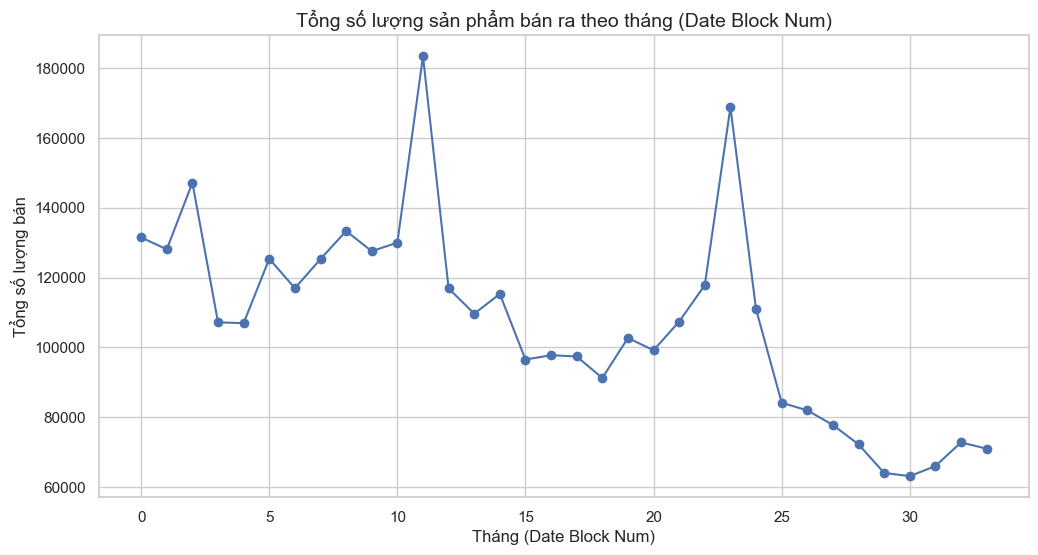

In [4]:
# Nhóm theo date_block_num (số thứ tự tháng) và tính tổng item_cnt_day
monthly_sales = df.groupby('date_block_num')['item_cnt_day'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b')
plt.title('Tổng số lượng sản phẩm bán ra theo tháng (Date Block Num)', fontsize=14)
plt.xlabel('Tháng (Date Block Num)', fontsize=12)
plt.ylabel('Tổng số lượng bán', fontsize=12)
plt.grid(True)
plt.show()

- Tính mùa vụ (Seasonality): Doanh số đạt đỉnh rõ rệt vào tháng 12 hàng năm (tương ứng mốc 11 và 23), cho thấy sự phụ thuộc lớn vào nhu cầu mua sắm cuối năm.

- Xu hướng giảm (Declining Trend): Tổng thể lượng hàng bán ra đang đi xuống theo thời gian. Đỉnh doanh số của năm sau thấp hơn năm trước.

- Biến động chu kỳ: Ngay sau các đợt tăng trưởng mạnh (cuối năm), doanh số luôn giảm sâu vào các tháng đầu năm (tháng 1, 2).

5. Top 10 Cửa hàng có số lượng bán cao nhất

C:\Users\user\AppData\Local\Temp\ipykernel_12820\3453351759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shop_sales.index, y=shop_sales.values, order=shop_sales.index, palette='viridis')


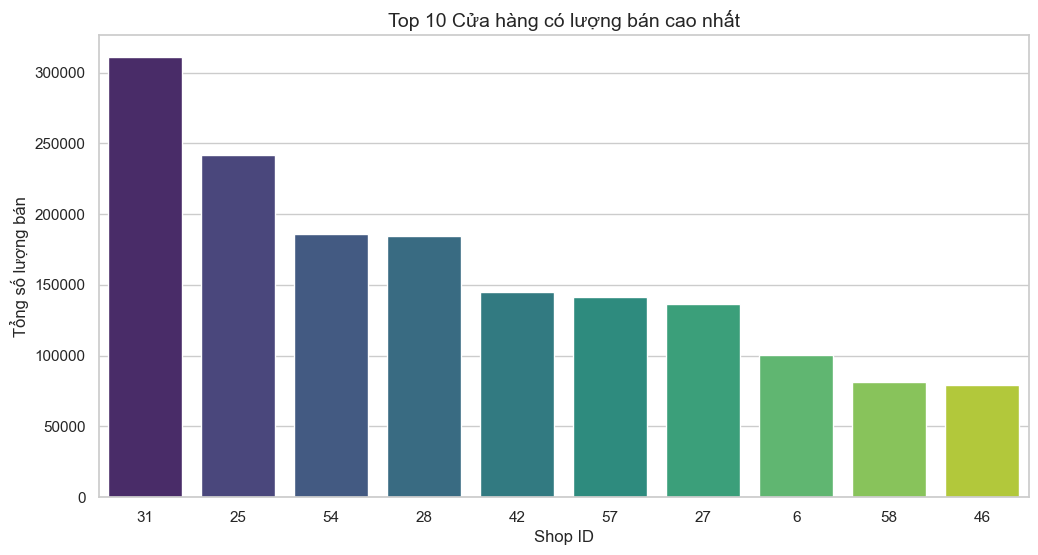

In [5]:
shop_sales = df.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=shop_sales.index, y=shop_sales.values, order=shop_sales.index, palette='viridis')
plt.title('Top 10 Cửa hàng có lượng bán cao nhất', fontsize=14)
plt.xlabel('Shop ID', fontsize=12)
plt.ylabel('Tổng số lượng bán', fontsize=12)
plt.show()

- Biểu đồ cho thấy Top 10 cửa hàng có tổng lượng bán cao nhất, trong đó Shop 31 dẫn đầu với doanh số vượt trội. Các cửa hàng còn lại có mức bán giảm dần, phản ánh sự chênh lệch rõ rệt về hiệu quả kinh doanh giữa các shop.


6. Phân phối giá sản phẩm (Item Price)

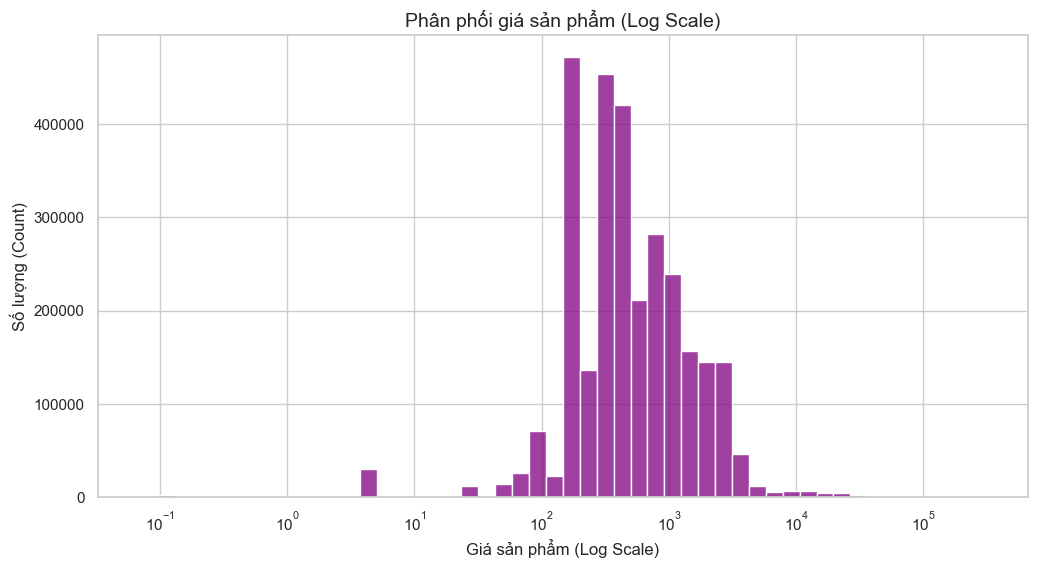

In [6]:
plt.figure(figsize=(12, 6))

# Sử dụng log scale vì có một số sản phẩm giá rất cao làm biểu đồ bị lệch
sns.histplot(df['item_price'], bins=50, log_scale=True, color='purple')

plt.title('Phân phối giá sản phẩm (Log Scale)', fontsize=14)
plt.xlabel('Giá sản phẩm (Log Scale)', fontsize=12)
plt.ylabel('Số lượng (Count)', fontsize=12)
plt.show()

- Giá tập trung ở mức trung bình:** Phần lớn sản phẩm nằm trong khoảng giá 100–1.000 (log scale), cho thấy thị trường chủ yếu bán các mặt hàng tầm trung.
- Ít sản phẩm giá quá thấp hoặc quá cao:** Các mức giá cực thấp và cực cao xuất hiện rất hiếm, tạo nên đuôi phân phối kéo dài.
- Phân phối lệch phải:** Do một số ít sản phẩm giá cao, biểu đồ nghiêng về phía bên phải — đặc trưng của dữ liệu giá trong thương mại điện tử.

7. Tính toán và vẽ biểu đồ doanh thu

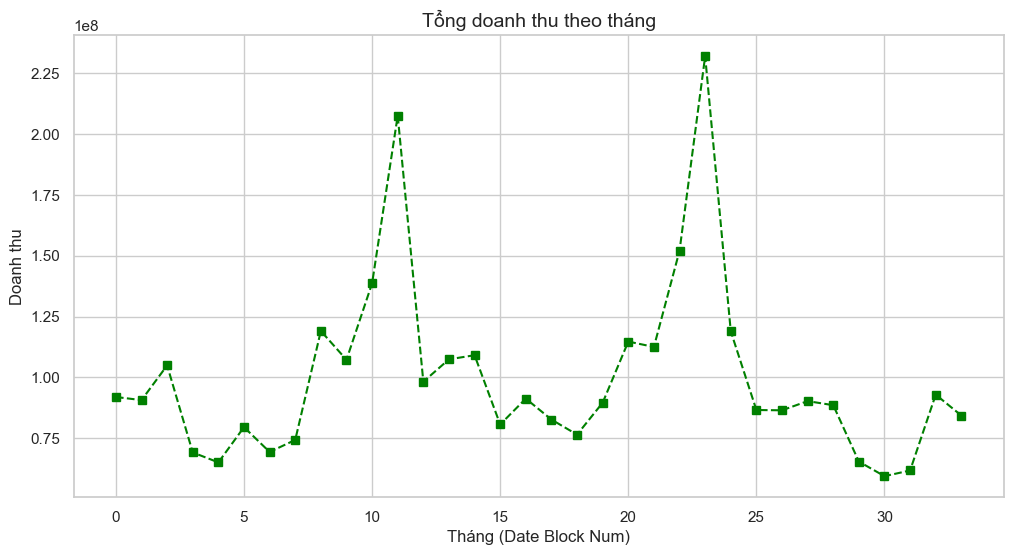

In [7]:
# Tạo cột doanh thu ngày
df['revenue'] = df['item_price'] * df['item_cnt_day']

# Tổng doanh thu theo tháng
monthly_revenue = df.groupby('date_block_num')['revenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='s', color='green', linestyle='--')
plt.title('Tổng doanh thu theo tháng', fontsize=14)
plt.xlabel('Tháng (Date Block Num)', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.grid(True)
plt.show()

 - Doanh thu tăng mạnh vào các tháng 11 và 23, cho thấy đây là giai đoạn bán hàng tốt nhất. Các tháng còn lại dao động ổn định quanh mức trung bình.